<div hidden>

\newcommand{\require}[1]{}

$\require{begingroup}\require{newcommand}$

$$
\gdef\R{\mathbb{R}}
\gdef\Cx{\mathbb{C}}
\gdef\Re{\mathrm{Re}}
\gdef\Im{\mathrm{Im}}
\gdef\Sin{S_{\mathrm{in}}}
\gdef\Fin{F_{\mathrm{in}}}
\gdef\Fout{F_{\mathrm{out}}}
\gdef\mumax{\mu_{\max}}
\gdef\rhomax{\rho_{\max}}
\gdef\qmax{q_{\max}}
\gdef\qmin{q_{\min}}
\gdef\dd{\mathrm{d}}
\gdef\ds{\mathrm{d}s}
\gdef\dx{\mathrm{d}x}
\gdef\dt{\mathrm{d}t}
\gdef\dq{\mathrm{d}q}
\gdef\dtau{\mathrm{d}\tau}
\gdef\ddt{\frac{\dd}{\dt}}
\gdef\dsdt{\frac{\ds}{\dt}}
\gdef\dxdt{\frac{\dx}{\dt}}
\gdef\dvdt{\frac{\dd v}{\dt}}
\gdef\dsigmadt{\frac{\dd\sigma}{\dt}}
\gdef\dvsdt{\frac{\dd (vs)}{\dt}}
\gdef\dvxdt{\frac{\dd (vx)}{\dt}}
\gdef\dqdt{\frac{\dq}{\dt}}
\gdef\partials#1#2{\frac{\partial#1}{\partial#2}}
\gdef\gL{g\cdot L^{-1}}
\gdef\CC{\mathcal{C}}
\gdef\vect{\mathrm{span}}
\gdef\pp#1{\left(#1\right)}
\gdef\bb#1{\left[#1\right]}
\gdef\cb#1{\left\{#1\right\}}
\gdef\abs#1{\left\lvert#1\right\rvert}
\gdef\norm#1{\left\lVert#1\right\rVert}
\gdef\sset#1#2{\cb{#1\left\lvert#2\right.}}
\gdef\mat#1{\begin{matrix}#1\end{matrix}}
\gdef\pmat#1{\begin{pmatrix}#1\end{pmatrix}}
\gdef\vmat#1{\begin{vmatrix}#1\end{vmatrix}}
\gdef\ub#1#2{\underbrace{#1}_{\substack{\text{#2}}}}
$$
</div>

# Growth of a single species with variable yield

In this notebook we will study the dynamics of the variable yield model of the growth
of a single species in a chemostat.
Also known as as the **Droop Model**.

## Constructing the model

We consider the dynamics of microbial growth of a single species with **variable yield**
in stirred tank reactors (chemostat) assuming the medium is homogeneous.

Let's consider:
- $s(t)$ is the free substrate concentration ($\gL$) at time $t$
- $x(t)$ is the biomass concentration ($\gL$) at time $t$
- $q(t)$ is the cell quota which is the average stored nutrient per cell at time $t$
- $\sigma(t)$ is the total nutrient ($\gL$) at time $t$
- $\Sin$ is the substrate intake concentration ($\gL$)
- $D$ is the dilution rate ($h^{-1}$)
- $\mu(\cdot)$ is a the specific growth velocity function its values are measured in $h^{-1}$.
- $\rho(\cdot)$ is a the nutrient uptake function its values are measured in $h^{-1}$.

All of the values and parameters are positive.

The model can be constructed as follows:
$$\begin{cases}
\dsdt &=-\ub{\rho(\cdot)x}{uptake} + \ub{D\Sin}{inflow} - \ub{Ds}{outflow} &= -\rho(\cdot)x + D(\Sin-s)\\
\dxdt &=\ub{\mu(\cdot)x}{biomass growth} - \ub{Dx}{outflow} &= (\mu(\cdot) - D)x\\
\dsigmadt &= \ub{D\Sin}{inflow} - \ub{D\sigma}{outflow} &= D(\Sin - \sigma)
\end{cases}$$

The total nutrient $\sigma$ is the sum of the free and stored nutrient $\boxed{\sigma = s + xq}$,
we can exploit this relation to express the rate of change of the cell quota $q$.

\begin{align}
\sigma &= s + xq\\
\dot{\sigma} &= \dot{s} + \dot{x}q + x\dot{q}\\
D(\Sin - \sigma) &= \bb{-\rho(\cdot)x + D(\Sin - s)} + \bb{(\mu(\cdot) - D)x}q + x\dot{q}\\
D(\Sin - s - xq) &= -\rho(\cdot)x + D(\Sin - s) + (\mu(\cdot) - D)xq + x\dot{q}\\
D(\Sin - s) - Dxq &= -\rho(\cdot)x + D(\Sin - s) + \mu(\cdot)xq - Dxq + x\dot{q}\\
0 &= -\rho(\cdot)x + \mu(\cdot)xq + x\dot{q}\\
x\dot{q} &= \rho(\cdot)x - \mu(\cdot)xq\\
\end{align}

Dividing the previous formula by $x$ gives an explicit expression for $\dot{q}$.
$$\dot{q} = \ub{\rho(\cdot)}{quota uptake} - \ub{\mu(\cdot)q}{growth uptake}$$
Which holds for $x\neq 0$. However, the we extend this formula to include the case $x=0$
therefore we study the system whose system is defined by $(s,x,q)$ at time $t$.

\begin{equation}
\begin{cases}
\dot{s} &=-\rho(\cdot)x + D(\Sin-s)\\
\dot{x} &= (\mu(\cdot) - D)x\\
\dot{q} &= \rho(\cdot) - \mu(\cdot)q
\end{cases}\tag{I}
\end{equation}

It can be beneficial to study an alternate formulation of this model,
by replacing the cell quota (which is a dimensionless variable)
by the total stored nutrient (which is a concentration value measured in $\gL$).
Let $\boxed{z(t)=x(t)q(t)}$ be the total stored nutrient at time $t$,
therefore $\sigma = s + z$.

\begin{align}
\sigma &= s + z\\
\dot{\sigma} &= \dot{s} + \dot{z}\\
D(\Sin - \sigma) &= \bb{-\rho(\cdot)x + D(\Sin - s)} + \dot{z}\\
D(\Sin - s - z) &= -\rho(\cdot)x + D(\Sin - s) + \dot{z}\\
-Dz &= -\rho(\cdot)x + \dot{z}\\
\dot{z} &= \rho(\cdot)x - Dz
\end{align}

\begin{equation}
\begin{cases}
\dot{s} &=-\rho(\cdot)x + D(\Sin-s)\\
\dot{x} &= (\mu(\cdot) - D)x\\
\dot{z} &= \rho(\cdot)x - Dz
\end{cases}\tag{II}
\end{equation}

## Uptake rate function $\rho$

The function $\rho(\cdot)$ modelizes the nutrient uptake rate, the rate at which
the biomass stores the free nutrient (substrate).
This rate is usually expressed as a function of $s$ and $q$,
as the rate increases with the increase of substrate $s$ in a Monod-like form,
while it decreases with the increase of cell quota $q$.

$$\rho(s,q) = \rhomax(q)\frac{s}{k_s + s}$$

where:
- $k_s$ is the semi-saturation constant
- $\rhomax(q)$ is an affine decreasing function defined for $q\in[\qmin,\qmax]$.

In this study, we consider $\rhomax(q)$ a constant function,
therefore $\rho(s,q)=\rho(s)$ is a Monod function.

## Specific growth velocity $\mu$

The function $\mu(\cdot)$ modelizes the growth rate of the biomass,
naturally, it depends on the internal cell quota.
Nevertheless, the cell quota should be higher than a minimum value $\qmin$
for the cells to divide.
For $q\geq\qmin$, $\mu(q)$ is also a Monod function.

$$\mu(q) = \mumax \frac{(q-\qmin)_+}{k_q + (q-\qmin)_+}$$

where $(\cdot)_+:x\mapsto max(x,0)=\begin{cases}x &\text{if}~x\gt0\\0 &\text{otherwise}\end{cases}$
and $k_q$ is the semi-saturation constant.

We notice that for $k_q=\qmin$, the function becomes

$$\mu(q) = \mumax \pp{1-\frac{\qmin}{q}}_+$$

Alas, we will use the first form in this study.

## Model reduction

The rate of change in the total nutrient $\sigma$ is an autonomous linear first order ODE
\begin{align*}
\dot{\sigma} &= D(\Sin - \sigma)\\
\dot{\sigma} + D\sigma &= D\Sin\\
e^{Dt}\dot{\sigma} + De^{Dt}\sigma &= D\Sin e^{Dt}\\
\ddt\pp{e^{Dt}\sigma} &= D\Sin e^{Dt}\\
e^{Dt}\sigma(t) - \sigma(0) &= \Sin\int_0^t De^{D\tau}\dtau\\
e^{Dt}\sigma(t) &= \sigma(0) + \Sin(e^{Dt} - 1)\\
\sigma(t) &= \sigma(0)e^{-Dt} + \Sin(1 - e^{-Dt})
\end{align*}

Therefore, the total nutrient stabilizes at $\lim\limits_{t\to\infty}\sigma(t) = \Sin$.
Hence, solutions of the system (I) approach the surface
$\Sigma = \sset{(s,x,q)\in\R_+^3}{s + xq = \Sin}$.
Similarly, the solutions of the system (II) approach the surface
$\tilde\Sigma = \sset{(s,x,z)\in\R_+^3}{s + z = \Sin}$.

Moreover, if $\forall (s,x,q)\in\R_+^3, \sigma=s+xq=\Sin \iff \dot{\sigma}=0$,
which means that $\Sigma = \sset{(s,x)\in\R_+^2}{\dot{\sigma}=0}$.
Indeed, $\Sigma$ is an **exponentially attracting invariant set**.

We exploit this fact as we study the asymptotical behaviour of the system.
In fact, we consider the cell quota a function of the biomass and the free substrate $q(s,x)=\frac{\Sin-s}{x}$.

\begin{equation}
\begin{cases}
\dot{s} &=-\rho(s)x + D(\Sin-s)\\
\dot{x} &= (\mu(q(s,x)) - D)x
\end{cases}\tag{III}
\end{equation}

Now that we have defined the model, so without further ado, we can study its dynamics.

## Model dynamics

### Nullclines

Nullclines (zero-growth isoclines).

#### Biomass nullcline $\dxdt=0$

We seek to find the states of the system $(s,x,q)$ at which the biomass is invariant.
Let'es denote,
$$ I_x = \sset{(s,x,q)\in\R^3_+}{\dxdt=0} $$
Expanding the expression for $\dxdt$
$$I_x = \sset{(s,x,q)\in\R^3_+}{(\mu(q) - D)x=0}
= \cb{(s,0,q)\in\R^3_+} \cup \sset{(s,x,\mu^{-1}(D))\in\R^3_+}{D\lt\mumax}$$

The set $\cb{(s,0,q)}$ is a vertical plane that corresponds to no biomass ($x=0$),
this plane in logically invariant.

The set $\cb{(s,x,\mu^{-1}(D))}$ corresponds to the horizontal plane that corresponds
to the cell quota concentration $q=\mu^{-1}(D)$ which is a well-defined value
if $D\lt\mumax$, that gives $q\gt\qmin$ for $D\gt0$ since $\mu$ is a non-decreasing
function and $\mu([0,\qmin])=\cb{0}$.

#### Substrate nullcline $\dsdt=0$

Similarly as for the biomass, we aim to find the states $(s,x,q)$
that leave the substrate concentration invariant.
$$I_s = \sset{(s,x,q)\in\R^3_+}{\dsdt=0}
= \cb{\pp{s,\frac{D(\Sin - s)}{\rho(s)},q}\in\R^3_+}$$

#### Cell quota nullcline $\dqdt=0$

In order to define the cell quota nullcline, we need to seperate
the values of $q$ according to the bifurcation value $\qmin$.

$$I_q = \sset{(s,x,q)\in\R^3_+}{\dqdt=0}
= \sset{(s,x,q)\in\R^3_+}{\dqdt=0,q\leq\qmin}\cup\sset{(s,x,q)\in\R^3_+}{\dqdt=0,q\gt\qmin}$$

- For $q\leq\qmin,\dot{q}=0\implies s=0$ therefore the first part of the cell quota
  nullcline is simply the plane segment $\sset{(0,x,q)\in\R^3_+}{q\leq\qmin}$.
- For $q\gt\qmin$, the expression $\dot{q}=\rho(s)-\mu(q)q=0$ can be expanded
  with respect to $\rho(s)$ which yields $s=\frac{k_s q\mu(q)}{\rhomax-q\mu(q)}$,
  this represents a surface in that is constant with respect to $x$.

$$I_q = \sset{(0,x,q)\in\R^3_+}{q\leq\qmin}
\cup\sset{(s,x,q)\in\R^3_+}{s=\frac{k_s q\mu(q)}{\rhomax-q\mu(q)},q\gt\qmin}$$

### Equilibria

We search for the system's equilibria;
The set of equilibrium points can be defined as $E = I_s \cap I_x \cap I_q$.
Which corresponds geometrically to the intersection of the $I_x$, $I_s$, and $I_q$ nullclines.

These surfaces intersect in two points:
- $E_0 = (\Sin,0,q_0)$ where $q_0$ is the unique solution of $q_0\mu(q_0)=\rho(\Sin)$
- $E_1 = (s_1,x_1,q_1)$ where
  $\begin{cases}
  s_1 = \rho^{-1}(q_1\mu(q_1))=\rho^{-1}(D\mu^{-1}(D))\\
  x_1 = \frac{D(\Sin - s_1)}{\rho(s_1)}\\
  q_1 = \mu^{-1}(D)
  \end{cases}$

These results warrant a few comments:

- Both points of intersection fall in the non-planar surface of the cell quota nullcline i.e. $q\gt\qmin$.
- The point $E_0$ is the washout equilibrium, and it exists regardless of the choice of parameters (as long as they are positive).
- The point $E_1$ only exists if $D\lt\mumax$ and $D\mu^{-1}(D)\lt\rhomax$ in addition to the positivity
  of the coordinates, which is verified for $s_1\lt\Sin$.

## Local stability around equilibria

### System Jacobian

$$\begin{cases}
\dot{s} = f_1(s,x,q) = -\rho(s)x + D(\Sin - s)\\
\dot{x} = f_2(s,x,q) = (\mu(q) - D)x\\
\dot{q} = f_3(s,x,q) = \rho(s) - q\mu(q)
\end{cases}$$

$$J(s,x,q) = \pmat{
\partials{f_1}{s} & \partials{f_1}{x} & \partials{f_1}{q}\\
\partials{f_2}{s} & \partials{f_2}{x} & \partials{f_2}{q}\\
\partials{f_3}{s} & \partials{f_3}{x} & \partials{f_3}{q}}
= \pmat{
-\rho'(s)x - D & -\rho(s) & 0 \\
0 & \mu(q) - D & \mu'(q)x\\
\rho'(s)  & 0 & -\mu(q)-q\mu'(q)
}$$

#### System around $E_0$

$$A=J(\Sin,0,q_0)=\pmat{
-D & -\rho(\Sin) & 0 \\
0 & \mu(q_0) - D & 0\\
\rho'(\Sin) & 0 & -\mu(q_0)-q_0\mu'(q_0)
}$$

The eigenvalues of $A$ are the roots of the characteristic polynomial $\chi_A(\lambda)=\det(A-\lambda Id)$
and the associated eigenspace $S_{A,\lambda}=\ker(A-\lambda Id)$.

Here,
$$\chi_A(\lambda)=\det(A-\lambda Id) = 0 \implies
\begin{cases}
\lambda_1 = -D<0\\
\lambda_2 = \mu(q_0)-D\\
\lambda_3 = -\mu(q_0) -q_0\mu'(q_0)<0
\end{cases}$$

As both $\lambda_1$ and $\lambda_3$ are strictly negative regardless of the values of the parameters,
the local stability around $E_0$ is solely determined by $\lambda_2=\mu(q_0)-D$.

**Proposition:** if $D\lt\mumax$ and $D\mu^{-1}(D)\lt\rhomax$, then the following assertions are equivalent:
1. The equilibrium $E_1$ is not well-defined
2. $s_1 > \Sin$
3. $q_1 > q_0$
4. $D\mu^{-1}(D)\gt\rho(\Sin)$
5. $\lambda_2\lt0$
6. The system is locally stable around $E_0$

*Proof:*

We remind that $E_1 = (s_1,x_1,q_1)$ with
$\begin{cases}
s_1 = \rho^{-1}(q_1\mu(q_1))\\
x_1 = \frac{D(\Sin - s_1)}{\rho(s_1)}\\
q_1 = \mu^{-1}(D)
\end{cases}$,
while the coordinates of $E_1$ are defined if $D\lt\mumax$ and $D\mu^{-1}(D)\lt\rhomax$,
in order for $E_1$ to be well-defined, the coordinates have to be non-negative.
Indeed, $s_1$ and $q_1$ are positive since $\rho(s)$ is a positive and increasing function
for all $s>0$, therefore $\rho^{-1}(r)$ is also positive and increasing for all $r>0$.
Similarly, $\mu(q)$ is positive and increasing for all $q\gt\qmin$ therefore
$\mu^{-1}(d)\gt\qmin$ for all $d>0$.
Nevertheless, $x_1$ is non-negative if and only if $s_1\leq\Sin$,
which implies that given $D\lt\mumax$ and $D\mu^{-1}(D)\lt\rhomax$,
the equilibrium $E_1$ is not well-defined if and only if $s_1 > \Sin$.

Moreover, we remind that $q_0$ and $q_1$ are greater than $\qmin$, therefore
\begin{align}
s_1 &> \Sin\\
\rho^{-1}(q_1\mu(q_1)) &> \Sin\\
q_1\mu(q_1) &> \rho(\Sin)\tag{since $\rho$ is increasing}\\
q_1\mu(q_1) &> q_0\mu(q_0)\tag{by definition of $E_0$}\\
q_1 &> q_0\tag{since $\mu$ is increasing}\\
\mu^{-1}(D) &> q_0\tag{by definition of $E_1$}\\
D &> \mu(q_0)\tag{since $\mu$ is increasing}\\
0 &> \mu(q_0) - D\\
0 &> \lambda_2
\end{align}

In addition, $q_1\mu(q_1) = D\mu^{-1}(D)$ since $q_1 = \mu^{-1}(D)$, hence
$$s_1 > \Sin \iff q_1 > q_0 \iff D\mu^{-1}(D)\gt\rho(\Sin) \iff\lambda_2\lt0$$
Given that both $\lambda_1$ and $\lambda_3$ are strictly negative,
$\lambda_2\lt0 \iff$ the system is locally stable around $E_0$. $\qed$

- If $D\mu^{-1}(D)\lt \rho(\Sin)$ then $\lambda_2\gt 0$, then the system is locally unstable around $E_0$.
- If $D\mu^{-1}(D)\gt \rho(\Sin)$ then $\lambda_2\lt 0$, then $E_0$ is a local attractor
  (i.e. points close enough to $E_0$ converge to $E_0$).

#### System around $E_1$

We remind that $E_1$ well-defined for $D\lt\mumax, D\mu^{-1}(D)\lt\rhomax$
and $D\mu^{-1}(D)\lt \rho(\Sin)$.

$$B=J(s_1,x_1,q_1)=\pmat{
-\rho'(s_1)x_1 - D & Dq_1 & 0 \\
0 & 0 & \mu'(q_1)x_1\\
\rho'(s_1) & 0 & -D-q_1\mu'(q_1)
}$$

$$\chi_B(\lambda)=\det(B-\lambda Id)
= -\lambda^3 - \alpha\lambda^2 - \beta\lambda - \gamma~
\text{with}~\begin{cases}
\alpha = \rho'(s_1)x_1 + 2D + q_1\mu'(q_1) > 0\\
\beta = D\rho'(s_1)x_1 + \rho'(s_1)x_1q_1\mu'(q_1) + Dq_1\mu'(q_1) + D^2 > 0\\
\gamma = D\rho'(s_1)x_1q_1^2 > 0
\end{cases}$$

Explicit expressions of the roots of the characteristics polynomial $\chi_B(\lambda)$
are hard to obtain, and might not help conclude about their negativity.

We can however exploit Descarte's sign rule, which helps reach the following conclusion:
- Either all the eigenvalues are real and negative, which means that the system is locally stable around $E_1$.
- Or, one eigenvalue is real and negative, and the remaining two are complex conjugates.

In the second case, we cannot conclude using Descarte's rule about the sign
of the real part of the complex eigenvalues.
Consequently, we cannot conclude with this approach about the local stability around $E_1$.

Naturally, we suspect the system is locally stable around $E_1$,
in order to test our suspicions, before diving into more calculations,
a reasonable approach is to test numerically if $B$ might have
complex eigenvalues whose real part is non-negative.
While this approach cannot confirm the local stability around $E_1$,
it may however confirm its unstability which would point us
in an alternative direction.

In [ ]:
%run ../droop.py
import numpy as np

def calculate_B(E1, **kw):
    rs = rho_deriv(E1[0], **kw)
    D = kw['D']
    mq = mu_deriv(E1[2], **kw)
    B = np.array([
        [-rs*E1[1]-D, -D*E1[2], 0          ],
        [0          , 0       , mq*E1[1]   ],
        [rs         , 0       , -D-mq*E1[2]],
    ])
    return B

def check_positive_B_eigenvalues(parameters):
    E = equilibria(**parameters)
    if len(E) < 2:
        return False
    B = calculate_B(E[1], **parameters)
    return np.any(np.real(np.linalg.eigvals(B)) > np.finfo(float).eps)

def is_E1_unstable(RANGE=np.arange(0.1, 5, 0.1)):
    pdict = {}
    for D in RANGE:
        pdict['D'] = D
        for Sin in RANGE:
            pdict['Sin'] = Sin
            for mumax in RANGE:
                pdict['μmax'] = mumax
                for rhomax in RANGE:
                    pdict['ρmax'] = rhomax
                    for qmin in RANGE:
                        pdict['qmin'] = qmin
                        for ks in RANGE:
                            pdict['ks'] = ks
                            for kq in RANGE:
                                pdict['kq'] = kq
                                verdict = check_positive_B_eigenvalues(pdict)
                                if verdict:
                                    return pdict
    return False

p = is_E1_unstable(RANGE=np.arange(0.1, 5, 0.3))
if p is False:
    print("The eigenvalues are negative or has a negative real part for all tested parameters.")
else:
    E = equilibria(**p)
    B = calculate_B(E[1], **p)
    vals = np.linalg.eigvals(B)
    print("Found counter-example!")
    print("Parameters:", p)
    print("Jacobian at E1:\n", B)
    print("Eigenvalues:", vals)
    print("System is not locally stable around E1")

Numerical tests do not reject the hypothesis that $E_1$ is stable.
While such test cannot confirm the local stability around $E_1$,
the absence of any counter-example helps confirm our suspicions,
justifying further efforts to prove its stability analytically.

While the study of the the system (II) would end up with the same block,
as the characteristics polynomial of the System's Jacobian around $E_1$
has a similar expression of that of the system (I).
A reasonable approach is studying the stability around $E_1$ in the reduced
system (III).

Indeed, the reduced system describes the original system asymptotically,
where $\sigma=s+xq$ would be close to its limit $\Sin$.

In the reduced system, $q(s,x)=\frac{\Sin-s}{x}$.

$$\begin{cases}
\dot{s} = f_1(s,x) = -\rho(s)x + D(\Sin - s)\\
\dot{x} = f_2(s,x) = (\mu(q(s,x)) - D)x
\end{cases}$$

$$J(s,x) = \pmat{
-\rho'(s)x - D & -\rho(s) \\
\mu'(q)\partials{q}{s}x & \mu'(q)\partials{q}{x}x+\mu(q)-D
} = \pmat{
-\rho'(s)x - D & -\rho(s) \\
-\mu'(q) & \frac{-(\Sin-s)}{x}\mu'(q)+\mu(q)-D
}$$

In the reduced system, $(s_1,x_1)$ the coordinates of $E_1$, where $x_1>0, D<\mumax$
and $D\mu^{-1}(D)\lt\rhomax$, are characterized by
$$\begin{cases}
-\rho(s_1)x_1 + D(\Sin - s_1)\\
\mu(q(s_1,x_1)) - D = 0
\end{cases}\implies\begin{cases}
x_1 = \frac{D(\Sin - s_1)}{\rho(s_1)}\\
q(s_1,x_1) = \mu^{-1}(D) = \frac{\Sin-s_1}{x_1}
\end{cases}\implies\begin{cases}
s_1 = \rho^{-1}(D\mu^{-1}(D))\\
x_1 = \frac{\Sin - s_1}{\mu^{-1}(D)}
\end{cases}$$

$$\tilde{B}=J(s_1,x_1) = \pmat{
-\rho'(s_1)x_1 - D & -D\mu^{-1}(D) \\
\mu'(q(s_1,x_1)) & -\mu^{-1}(D)\mu'(q(s_1,x_1))
}\implies
\chi_{\tilde{B}}(\lambda)=\det(\tilde{B}-\lambda Id)
=\lambda^2 - \mathrm{tr}(\tilde{B})\lambda + \det(\tilde{B})$$

Moreover,
$$\begin{cases}
\mathrm{tr}(\tilde{B}) = -\rho'(s_1)x_1 - D -\mu^{-1}(D)\mu'(q(s_1,x_1)) < 0\\
\det(\tilde{B}) = (\rho'(s_1)x_1+D)\mu^{-1}(D)\mu'(q(s_1,x_1)) + D\mu^{-1}(D)\mu'(q(s_1,x_1)) > 0
\end{cases}$$

Since $\mathrm{tr}(\tilde{B}) < 0$ and $\det(\tilde{B}) > 0$, then the eigenvalues of $\tilde{B}$
are either real and negative, or complex conjugates with a negative real part.
This implies that the reduced system is locally stable around $E_1$,
which helps us conclude that the original system is locally stable around $E_1$
if $\sigma$ is close enough to $\Sin$.

##### Summary for local stability

|       |$$D\mu^{-1}(D)< \rho(\Sin)$$|$$D\mu^{-1}(D)> \rho(\Sin)$$|
|:-----:|:--------------------------:|:--------------------------:|
| $E_0$ |         unstable           |         attractor          |
| $E_1$ |         attractor          |         undefined          |

## Phase Portraits

While phase portraits are a great visualization tool for dynamical systems,
trajectories plots in $\R^3$ prove ineffective in that regard.

Nevertheless, we can visualize the vector field for the rates of change as a start.

<Figure size 1000x1000 with 0 Axes>

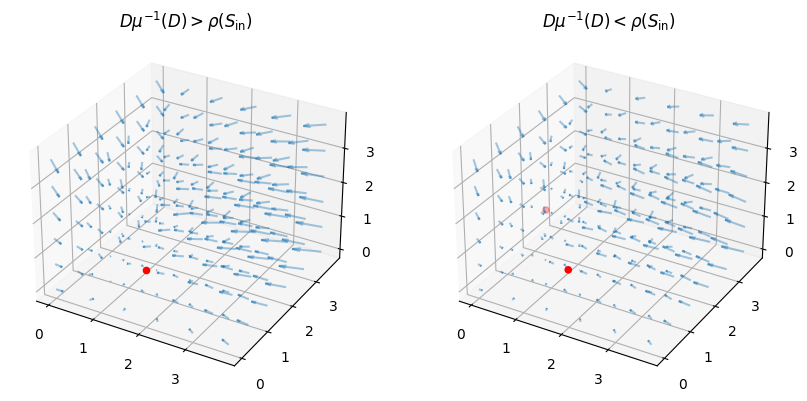

In [16]:
%matplotlib inline
%run ../droop.py
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=10,10

s = np.arange(0, 4, 0.75)
x = np.arange(0, 4, 0.75)
q = np.arange(0, 4, 0.75)
S, X, Q = np.meshgrid(s, x, q)

fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={"projection": "3d"})
title = '$D\\mu^{{-1}}(D) {} \\rho(S_\\mathrm{{in}})$'
ax[0].set_title(title.format('>'))
params.update(D=0.8)
dS, dX, dQ = f(S, X, Q, **params)
ax[0].quiver(S, X, Q, dS, dX, dQ, alpha=0.4, length=0.1)
E = np.array(equilibria(**params))
ax[0].scatter(E[:,0], E[:,1], E[:,2], color='r')

ax[1].set_title(title.format('<'))
params.update(D=0.4)
dS, dX, dQ = f(S, X, Q, **params)
ax[1].quiver(S, X, Q, dS, dX, dQ, alpha=0.4, length=0.1)
E = np.array(equilibria(**params))
ax[1].scatter(E[:,0], E[:,1], E[:,2], color='r')

plt.show()

### Phase Portrait $(s,x)$

/mnt/data/repositories/chemostat-models/droop.py:51: RuntimeWarning: divide by zero encountered in divide
  return D*(Sin - s) / rho(s, ρmax=ρmax, ks=ks)


<Figure size 1000x1000 with 0 Axes>

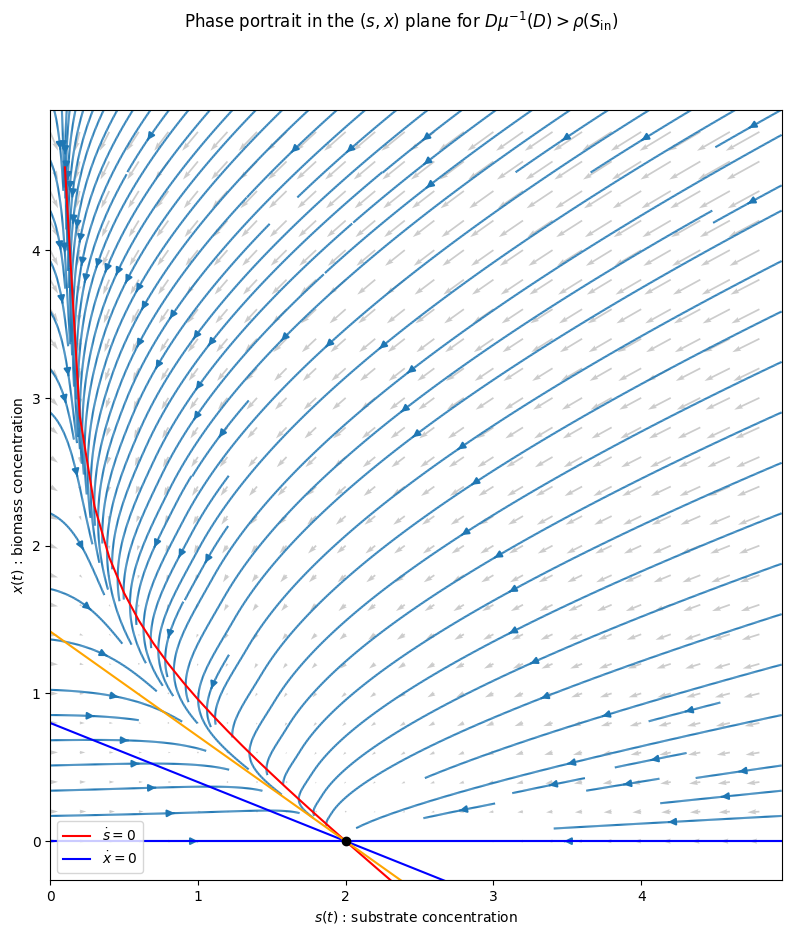

In [29]:
%run ../droop.py
%run ../api.py

title = 'Phase portrait in the ${}$ plane for $D\\mu^{{-1}}(D) {} \\rho(S_\\mathrm{{in}})$'
params.update(D=0.8)
def f_sx(s, x, **params):
    if isinstance(x, np.ndarray):
        q = np.zeros(x.shape)
        ind = x > 0
        q[ind] = (params['Sin'] - s[ind]) / x[ind]
    else:
        q = (params['Sin'] - s) / x if x > 0 else 0
    ds, dx, _ = f(s, x, q, **params)
    return ds, dx

fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111)
phase_portrait((0,5), (0,5), f_sx, mesh=0.2, step=0.05, dF_params=params,
               scale=30, density=(25, 1), title=title.format('(s,x)', '>'), ax=ax,
               xlabel='$s(t)$ : substrate concentration',
               ylabel='$x(t)$ : biomass concentration')

E = equilibria(**params)

xmin, xmax, ymin, ymax = ax.axis()
# s-nullcline
s = np.arange(xmin, xmax, 0.1)
ax.plot(s, isocline_ds_get_x(s, **params), color='r', label='$\\dot{s}=0$')
# x-nullcline
ax.axhline(y=0, xmin=xmin, xmax=xmax, color='b', label='$\\dot{x}=0$')
x = (params['Sin'] - s) / mu_inv(params['D'], **params)
ax.plot(s, x, color='b')
ax.plot(s, (params['Sin'] - s) / E[0][2], color='orange')
ax.axis([xmin, xmax, ymin, ymax])

eq_text = ['$E_0$', '$E_1$']
plot_equilibria_from_3D(E, z_axis=2, name=eq_text, ax=ax)
ax.legend()

plt.show()

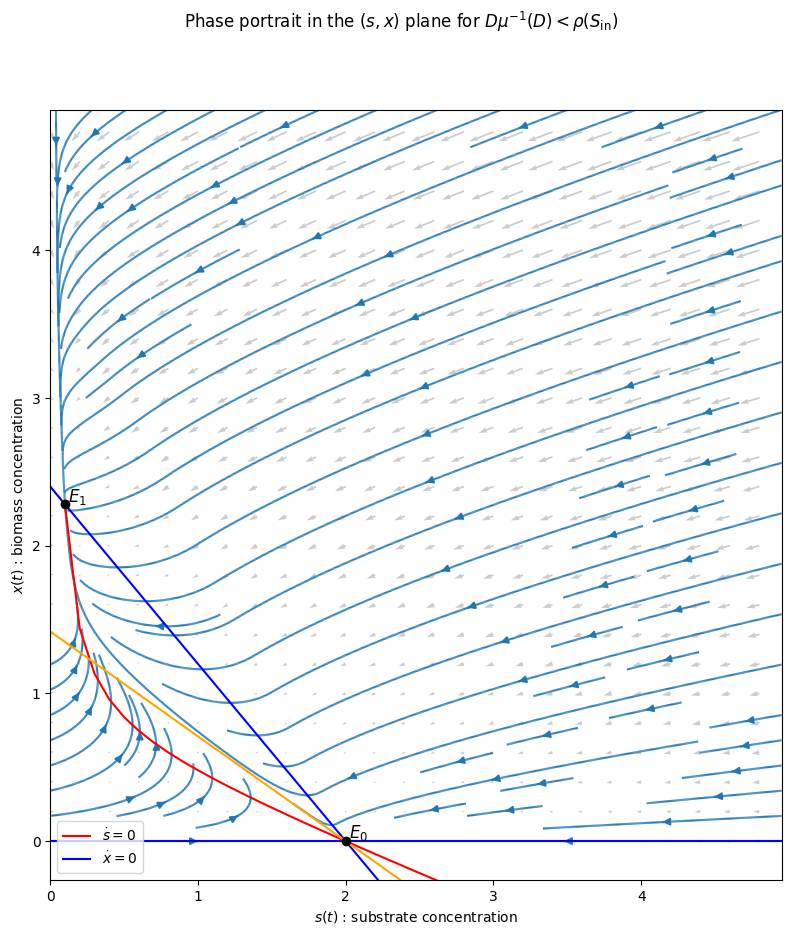

In [30]:
params.update(D=0.4)
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111)
phase_portrait((0,5), (0,5), f_sx, mesh=0.2, step=0.05, dF_params=params,
               scale=30, density=(25, 1), title=title.format('(s,x)', '<'), ax=ax,
               xlabel='$s(t)$ : substrate concentration',
               ylabel='$x(t)$ : biomass concentration')

E = equilibria(**params)

xmin, xmax, ymin, ymax = ax.axis()
# s-nullcline
s = np.arange(xmin, xmax, 0.1)
ax.plot(s, isocline_ds_get_x(s, **params), color='r', label='$\\dot{s}=0$')
# x-nullcline
ax.axhline(y=0, xmin=xmin, xmax=xmax, color='b', label='$\\dot{x}=0$')
x = (params['Sin'] - s) / mu_inv(params['D'], **params)
ax.plot(s, x, color='b')
ax.plot(s, (params['Sin'] - s) / E[0][2], color='orange')
ax.axis([xmin, xmax, ymin, ymax])
plot_equilibria_from_3D(E, z_axis=2, name=eq_text, ax=ax)
ax.legend()

plt.show()